In [27]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [28]:
df = pd.read_excel('ALL PRICES - NHC PROJECTS.xlsx',sheet_name=1)

In [29]:
df.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,KONGWA,2,56.0,normal,35492580.0,41881244.4,-6.2000,36.4170
1,KONGWA,3,70.0,normal,39835800.0,47006244.0,-6.2000,36.4170
2,KONGWA,3,56.0,normal,40166280.0,47396210.4,-6.2000,36.4170
3,MKUZO,2,56.0,normal,36310680.0,42846602.4,-10.6425,35.6317
4,MKUZO,3,70.0,normal,41727960.0,49238992.8,-10.6425,35.6317


In [30]:
#reshuffling the data
df_shuf=df.sample(frac=1).reset_index(drop=True)

In [31]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Jangwani - Sumbawanga,3,144.0,normal,139680000.0,1.648224e+08,-7.948900,31.616900
1,BOMBAMBILI,2,56.0,normal,36783720.0,4.340479e+07,-10.658900,35.646000
2,Mwongozo,3,100.0,normal,89505000.0,1.056159e+08,-6.797800,39.262100
3,Mchikichini - Dar es Salaam,3,115.8,normal,168239749.0,1.985229e+08,-6.820800,39.263300
4,Morocco Square - Dar es Salaam,3,154.0,Apartment,502425000.0,5.928615e+08,-6.776012,39.178326


<AxesSubplot:>

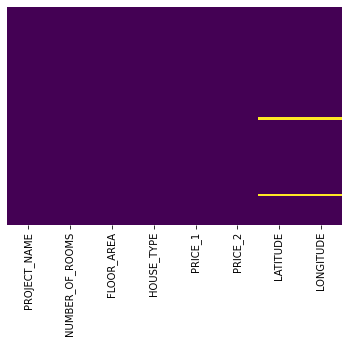

In [32]:
#visualizing the missing values present in the dataframe
sns.heatmap(df_shuf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [33]:
#conversion of categorical data to numerical values via direct mapping

scale_mapper= {'normal':1, 'Apartment':2}
df_shuf['HOUSE_TYPE'].replace(scale_mapper, inplace=True)

In [34]:
df_shuf['HOUSE_TYPE'].value_counts()

1    60
2    25
Name: HOUSE_TYPE, dtype: int64

In [35]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Jangwani - Sumbawanga,3,144.0,1,139680000.0,1.648224e+08,-7.948900,31.616900
1,BOMBAMBILI,2,56.0,1,36783720.0,4.340479e+07,-10.658900,35.646000
2,Mwongozo,3,100.0,1,89505000.0,1.056159e+08,-6.797800,39.262100
3,Mchikichini - Dar es Salaam,3,115.8,1,168239749.0,1.985229e+08,-6.820800,39.263300
4,Morocco Square - Dar es Salaam,3,154.0,2,502425000.0,5.928615e+08,-6.776012,39.178326


In [36]:
#dropping string columns and additional price column
new_df = df_shuf.drop(columns=['PROJECT_NAME','PRICE_1'], axis=1)

In [37]:
new_df.head(2)

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3,144.0,1,164822400.0,-7.9489,31.6169
1,2,56.0,1,43404789.6,-10.6589,35.6460


In [38]:
#filling the missing numerical values using the NN imputation method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

In [39]:
imput_df = imputer.fit_transform(new_df.values)
house_df = pd.DataFrame(imput_df, columns=new_df.columns)

<AxesSubplot:>

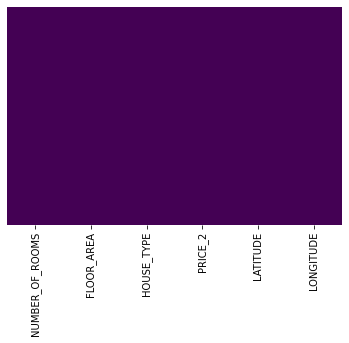

In [40]:
#visualizing the missing values present in the dataframe
sns.heatmap(house_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [41]:
#Standardizing the features using standard scaler for machine learning algorithms to understand
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standardized_df = scaler.fit_transform(house_df)

In [42]:
#creating dataframe conducive for the ML algorithms
best_df = pd.DataFrame(standardized_df, columns=new_df.columns)

In [43]:
best_df.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,0.245722,0.760423,-0.645497,-0.062401,-0.587758,-1.857528
1,-1.653038,-1.100901,-0.645497,-0.656928,-1.852001,-0.421025
2,0.245722,-0.170239,-0.645497,-0.352308,-0.050758,0.868230
3,0.245722,0.163953,-0.645497,0.102615,-0.061488,0.868658
4,0.245722,0.971937,1.549193,2.033514,-0.040594,0.838362


In [44]:
#checking correlation of each feature in relation to the price
corr_matrix = best_df.corr()
corr_matrix['PRICE_2'].sort_values(ascending=False)

PRICE_2            1.000000
FLOOR_AREA         0.864313
HOUSE_TYPE         0.746561
NUMBER_OF_ROOMS    0.533343
LONGITUDE          0.452649
LATITUDE          -0.011895
Name: PRICE_2, dtype: float64

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE_2'>

<Figure size 1080x576 with 0 Axes>

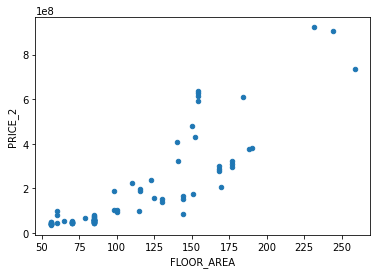

In [45]:
#plotting the most correlated feature against the price
plt.figure(figsize=(15,8))
house_df.plot(kind='scatter', x='FLOOR_AREA', y='PRICE_2', alpha=1)

/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

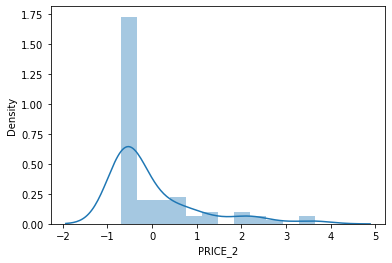

<Figure size 864x576 with 0 Axes>

In [46]:
#plotting the price distribution
sns.distplot(best_df.PRICE_2)
plt.figure(figsize=(12,8))

<AxesSubplot:>

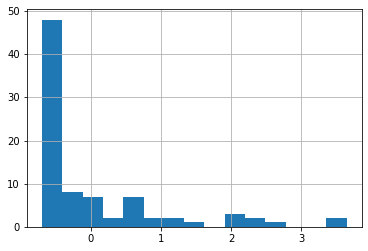

In [47]:
best_df['PRICE_2'].hist(bins=15)

<AxesSubplot:>

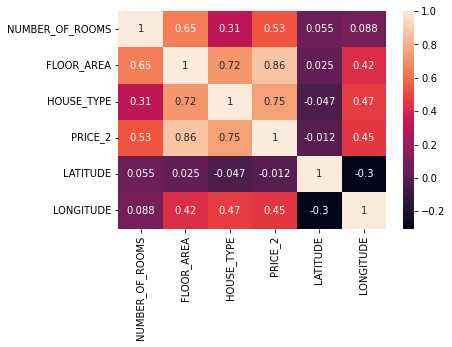

In [48]:
#heat map showing the correlation of features with respect to the price
sns.heatmap(best_df.corr(), annot=True)

In [49]:
#Assigning the features into X and Y 
X = best_df[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y = best_df['PRICE_2']

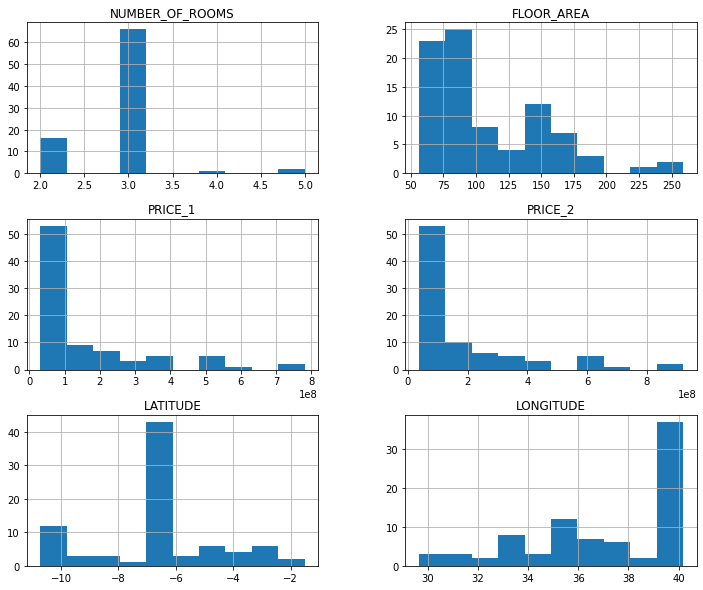

In [50]:
df.hist(figsize=(12,10))
plt.show()

KeyError: "None of [Index(['Col1', 'Col2'], dtype='object')] are in the [columns]"

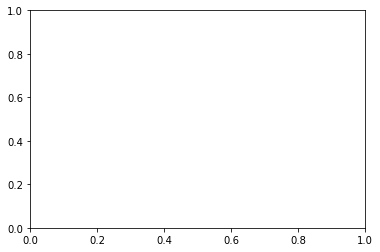

In [51]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4),)
boxplot = df.boxplot(column=['Col1', 'Col2',])


In [ ]:
#Splitting the features into training and test sets using scikit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
#importing evaluation metrics of linear regression models
from sklearn import metrics

In [ ]:
#Training using the linear regression Model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [ ]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = linear_regression.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))) #RMSE
print('\n')
print(metrics.r2_score(y_test,lr_pred)) #R2

0.4901833518904207


0.28428038244453446


In [ ]:
#checking other model performance
from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression, Ridge

In [ ]:
#Lasso regression
lasso_regres = Lasso()
lasso_regres.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_pred = lasso_regres.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('\n')
print(metrics.r2_score(y_test,lasso_pred))

0.7012211288297737


-0.464656535700569


In [ ]:
#ElasticNetRegression
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = elastic.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, elastic_pred)))
print('\n')
print(metrics.r2_score(y_test,elastic_pred))

0.4653617532775205


0.35492950092200093


In [ ]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('\n')
print(metrics.r2_score(y_test,ridge_pred))

0.4898454764650759


0.28526671021994476


In [ ]:
#Training using the decision trees 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('\n')
print(metrics.r2_score(y_test,dt_pred))

0.39435428315015747


0.5367675965088541


In [ ]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

0.24451095253614655


0.8219170087692144


/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_2', ylabel='Density'>

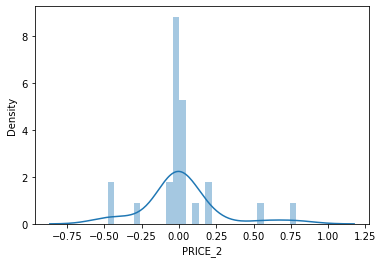

In [ ]:
sns.distplot((y_test-rfr_pred))

In [ ]:
#checking using the support vector regressor
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)
svr_pred = svr_regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('\n')
print(metrics.r2_score(y_test,svr_pred))

0.3349205661029577


0.6658746397728907


In [ ]:
#Inversing the standardized features
inv_df=scaler.inverse_transform(standardized_df, copy=None)
nhc = pd.DataFrame(inv_df,columns=new_df.columns)

In [ ]:
nhc.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3.0,85.0,1.0,47111382.0,-9.98190,39.69960
1,3.0,85.0,2.0,73219000.0,-6.20080,35.83690
2,3.0,188.0,2.0,376140000.0,-6.77900,39.25340
3,3.0,152.0,2.0,430464000.0,-6.78333,39.28333
4,2.0,140.0,2.0,408870000.0,-6.72310,39.22990


In [ ]:
#Assigning the features into X and Y 
X_column= nhc[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y_column = nhc['PRICE_2']

In [ ]:
#Splitting the features into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_column, y_column, test_size=0.3, random_state=20)

In [ ]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

49992817.976166785


0.8215068656801037


In [ ]:
y_test[:3]

66     42846602.4
51     57672500.0
12    152104100.4
Name: PRICE_2, dtype: float64

In [ ]:
rfr_pred[:3]

array([4.51758233e+07, 5.29860938e+07, 1.57941890e+08])

In [ ]:
#Saving every other model
from json5 import dump, load

In [ ]:
import pickle
with open('regressor_pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
# pred = loaded_regressor.predict(X_test)

In [ ]:
# pred[:5]

In [ ]:
X_test

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,LATITUDE,LONGITUDE
66,2.0,56.0,1.0,-10.642500,35.631700
51,3.0,85.0,1.0,-9.207300,34.064100
12,3.0,144.0,1.0,-6.797800,39.262100
83,2.0,56.0,1.0,-4.210000,35.770000
36,3.0,150.0,2.0,-6.723100,39.229900
44,3.0,177.0,2.0,-6.796200,39.269300
23,3.0,79.0,2.0,-6.200800,35.836900
0,3.0,85.0,1.0,-9.981900,39.699600
77,2.0,56.0,1.0,-9.239100,33.379500
45,3.0,85.0,1.0,-5.900000,37.400000
